In [188]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [200]:
from tsfresh import extract_features

df = pd.read_csv('stock_price_scaled.csv', index_col='date', parse_dates=True)
# df = df['2022':'2023']
# df = extract_features(df, column_id='close')
# df = df.dropna(axis=1)
# df.head()
df_train = df.loc['1990':'2015'][['close', 'volume']]
df_test = df.loc['2017'][['close', 'volume']]
print(f'{df_train.shape=}, {df_test.shape=}')

def reshape_data(data, window_size):
    x = []
    y = data[window_size:,:]
    # data = data.flatten()
    # print(data)
    for i in range(int(len(data)) - window_size):
        # print(data[:, 0][i:(i + window_size)] +  data[:, 1][i + window_size], data[:,0][(i + window_size):(i + window_size + out_size)])
        x.append(data[i:(i + window_size), :])
        # y.append(data[2*(i + window_size):2*(i + window_size + out_size)])
    return np.array(x), np.array(y)

# df_train.head(15)

df_train.shape=(6389, 2), df_test.shape=(247, 2)


In [201]:
length_of_sequences = 10
out_size = 1
# print(df_train.values)
train_x, train_y = reshape_data(df_train.values, length_of_sequences)
test_x, test_y = reshape_data(df_test.values, length_of_sequences)
print(train_x.shape, train_y.shape)
# print(train_x)
# print(train_y)
df_train.values[:16]

(6379, 10, 2) (6379, 2)


array([[ 0.97164595, -1.26571447],
       [ 0.91218053, -1.08612854],
       [ 0.93200233, -1.26107896],
       [ 0.95182414, -1.16109588],
       [ 0.93200233, -1.08604862],
       [ 0.95182414, -1.21472389],
       [ 0.8943409 , -1.19090698],
       [ 0.8943409 , -1.17700046],
       [ 0.8943409 , -1.16453254],
       [ 0.87451909, -1.18323442],
       [ 0.87451909, -1.21392467],
       [ 0.91218053, -1.17931821],
       [ 0.8943409 , -1.17923829],
       [ 0.87451909, -1.1069084 ],
       [ 0.85469728, -1.08588878],
       [ 0.8943409 , -1.01587664]])

In [191]:
train_y[:, 0]

array([0.87451909, 0.91218053, 0.8943409 , ..., 0.05587845, 0.07371808,
       0.08957553])

In [192]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.layers import LSTM



in_out_neurons = 1
hidden_neurons1 = 200
hidden_neurons2 = 100
length_of_sequences = 15

train_x, train_y = reshape_data(df_train.values, length_of_sequences)
test_x, test_y = reshape_data(df_test.values, length_of_sequences)
print(f'{train_x.shape=}, {train_y.shape=}')

model = Sequential()
model.add(LSTM(hidden_neurons1, input_shape=(length_of_sequences, 2), return_sequences=False))
model.add(Activation("relu"))
model.add(Dropout(0.2))
model.add(Dense(100))
model.add(Activation("relu"))
model.add(Dropout(0.3))
# model.add(Dense(50))
# model.add(Activation("relu"))
# model.add(Dropout(0.5))
model.add(Dense(in_out_neurons))
model.add(Activation("linear"))
model.compile(loss="mean_squared_error", optimizer="adam")
model.fit(train_x, train_y[:,0], batch_size=100, epochs=20, validation_split=0.2)


model_vol = Sequential()
model_vol.add(LSTM(hidden_neurons1, input_shape=(length_of_sequences, 2), return_sequences=False))
model_vol.add(Activation("relu"))
model_vol.add(Dropout(0.2))
model_vol.add(Dense(100))
model_vol.add(Activation("relu"))
model_vol.add(Dropout(0.3))
# model.add(Dense(50))
# model.add(Activation("relu"))
# model.add(Dropout(0.5))
model_vol.add(Dense(in_out_neurons))
model_vol.add(Activation("linear"))
model_vol.compile(loss="mean_squared_error", optimizer="adam")
model_vol.fit(train_x, train_y[:,1], batch_size=100, epochs=20, validation_split=0.2)

train_x.shape=(6374, 15, 2), train_y.shape=(6374, 2)
Epoch 1/20


c:\Users\nabem\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


51/51 ━━━━━━━━━━━━━━━━━━━━ 7s 67ms/step - loss: 0.1420 - val_loss: 0.0026
Epoch 2/20
51/51 ━━━━━━━━━━━━━━━━━━━━ 3s 52ms/step - loss: 0.0143 - val_loss: 0.0022
Epoch 3/20
51/51 ━━━━━━━━━━━━━━━━━━━━ 3s 58ms/step - loss: 0.0133 - val_loss: 0.0018
Epoch 4/20
51/51 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 0.0106 - val_loss: 0.0022
Epoch 5/20
51/51 ━━━━━━━━━━━━━━━━━━━━ 3s 57ms/step - loss: 0.0108 - val_loss: 0.0017
Epoch 6/20
51/51 ━━━━━━━━━━━━━━━━━━━━ 3s 59ms/step - loss: 0.0108 - val_loss: 0.0012
Epoch 7/20
51/51 ━━━━━━━━━━━━━━━━━━━━ 3s 58ms/step - loss: 0.0100 - val_loss: 0.0010
Epoch 8/20
51/51 ━━━━━━━━━━━━━━━━━━━━ 3s 60ms/step - loss: 0.0091 - val_loss: 0.0010
Epoch 9/20
51/51 ━━━━━━━━━━━━━━━━━━━━ 3s 59ms/step - loss: 0.0096 - val_loss: 0.0017
Epoch 10/20
51/51 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0089 - val_loss: 9.5144e-04
Epoch 11/20
51/51 ━━━━━━━━━━━━━━━━━━━━ 3s 50ms/step - loss: 0.0087 - val_loss: 8.7700e-04
Epoch 12/20
51/51 ━━━━━━━━━━━━━━━━━━━━ 3s 58ms/step - loss: 0.0096

In [193]:
pre = model.predict(test_x)
print(f'{pre.shape=}')

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
pre.shape=(230, 1)


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
(237, 1)


array([0.15253967], dtype=float32)

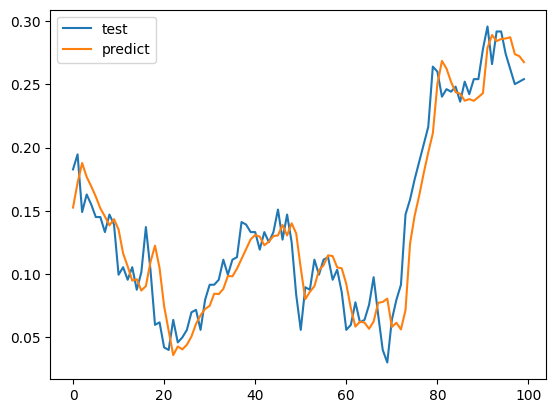

In [205]:
pre = model.predict(test_x)
print(pre.shape)
# plt.figure(figsize=(20, 30))
# for i in range(30):
#     plt.subplot(6, 5, i+1)
#     plt.plot(test_y[i], label='train')
#     plt.plot(pre[i], label='predict')
#     plt.legend()
# print(f'{test_y.shape}, {pre.shape}')

plt.figure()
plt.plot(test_y[:100, 0], label='test')
plt.plot(pre[:100, 0], label='predict')
plt.legend()
pre[:10][0]

(1, 10, 2)
[[[ 0.15895185  0.54181344]
  [ 0.17679148  0.55699872]
  [ 0.1847202   0.11055148]
  [ 0.1847202   0.47339976]
  [ 0.17282712  0.34784147]
  [ 0.15102313  0.40035057]
  [ 0.16688057  0.01600313]
  [ 0.16688057 -0.14512069]
  [ 0.14309441  0.15506833]
  [ 0.14904095  0.14979344]]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
test.shape=(22,), pre.shape=(1, 1), pre_vol.shape=(1, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
test.shape=(22,), pre.shape=(1, 1), pre_vol.shape=(1, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
test.shape=(22,), pre.shape=(1, 1), pre_vol.shape=(1, 1)
test_y[i:i+5, 0]=array([0.18273802, 0.1946311 , 0.14904095, 0.16291621, 0.15498749]), (3,)
(1, 10, 2)
[[[ 0.17679148  0.55699872]
  [ 0.1847202   0.11055148]
  [ 0.1847202   0.47339976]
  [ 0.17282712  0.34784147]
  [ 0.15102313  0.40035057]
  [ 0.16688057  0.01600313]
  [ 0.16688057 -0.14512069]
  [ 0.1430

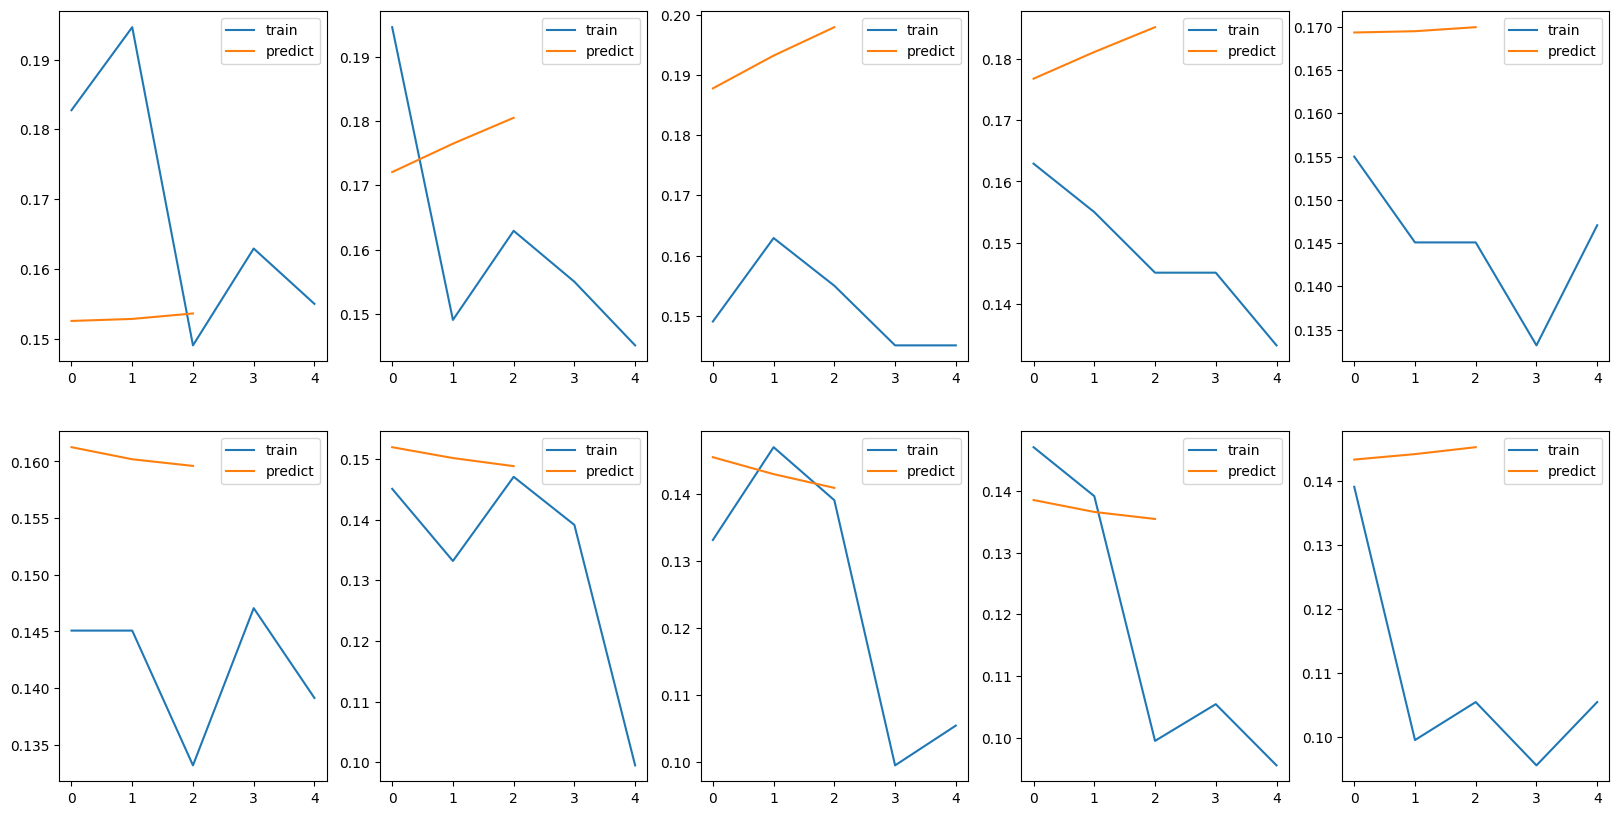

In [206]:
plt.figure(figsize=(20, 10))
for i in range(10):
    test = test_x[i].reshape(1, length_of_sequences, 2)
    print(test.shape)
    pred = np.array([])
    pred_vol = np.array([])
    print(f'{test}')
    for j in range(3):
        pre = model.predict(test)
        pre_vol = model_vol.predict(test)
        pred = np.append(pred, pre[0][0])
        pred_vol = np.append(pred_vol, pre_vol[0][0])
        test = np.append(test.flatten(), [pre[0][0], pre_vol[0][0]])
        print(f'{test.shape=}, {pre.shape=}, {pre_vol.shape=}')
        test = test[-2 * length_of_sequences:].reshape(1, length_of_sequences, 2)
    plt.subplot(2, 5, i+1)
    print(f'{test_y[i:i+5, 0]=}, {pred.shape}')
    plt.plot(test_y[i:i+5, 0], label='train')
    plt.plot(pred, label='predict')
    plt.legend()
    # pre[:10][0]

#     plt.subplot(2, 5, i+1)
#     plt.plot(test_y[i], label='train')
#     plt.plot(pre[i], label='predict')
#     plt.legend()
# print(f'{test_y.shape}, {pre.shape}')

# test = test_x[0].reshape(1, length_of_sequences)
# pred = np.array([])
# for i in range(5):
#     pre = model.predict(test)
#     pred = np.append(pred, pre[0][0])
#     test = np.append(test.reshape(length_of_sequences), pre[0][0])
#     test = test[-length_of_sequences:].reshape(1, length_of_sequences)

array([0.30404663], dtype=float32)

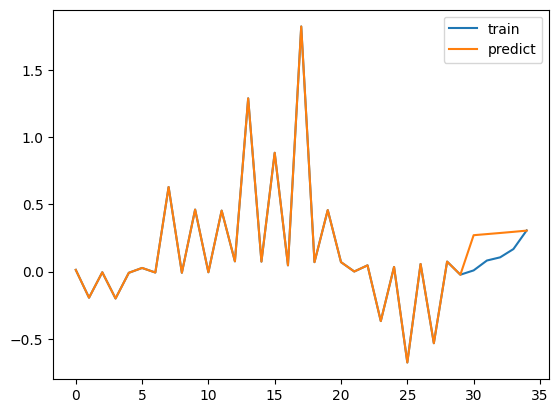

In [196]:
plt.figure()
plt.plot(np.append(train_x[-1], test_y[:5].T[0]), label='train')
plt.plot(np.append(train_x[-1], pred), label='predict')
plt.legend()
pre[:10][0]

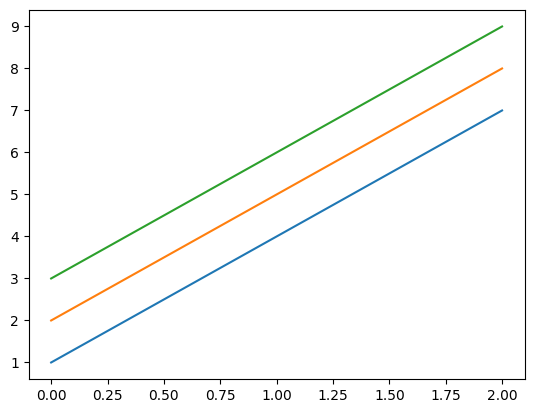

In [197]:
a = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
plt.plot(a)

In [198]:
loss = model.evaluate(test_x, test_y)
print(f'{loss=}')

ValueError: Cannot take the length of shape with unknown rank.